<a href="https://colab.research.google.com/github/HibaAp/Applied-Machine-Learning/blob/Assignment1-SMS-Classification/Assignment1_Prepare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
data=pd.read_excel('SpamHamData.xlsx')

data has no null values

In [3]:
data.columns=["label","messages"]

In [4]:
data

,label,messages
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...
...,...,...
5566,spam,This is the 2nd time we have tried 2 contact u...
5567,ham,Will ü b going to esplanade fr home?
5568,ham,"Pity, * was in mood for that. So...any other s..."
5569,ham,The guy did some bitching but I acted like i'd...


In [5]:
data

,label,messages
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...
...,...,...
5566,spam,This is the 2nd time we have tried 2 contact u...
5567,ham,Will ü b going to esplanade fr home?
5568,ham,"Pity, * was in mood for that. So...any other s..."
5569,ham,The guy did some bitching but I acted like i'd...


In [7]:
data["label"].unique()

array(['ham', 'spam'], dtype=object)

In [8]:
data.groupby('label').describe()

messages                                                               
         count unique                                                top freq
label                                                                        
ham       4824   4515                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [12]:
data['length'] = data['messages'].astype(str).map(lambda text: len(text))
print(data.head())

  label                                           messages  length
0   ham                      Ok lar... Joking wif u oni...      29
1  spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
2   ham  U dun say so early hor... U c already then say...      49
3   ham  Nah I don't think he goes to usf, he lives aro...      61
4  spam  FreeMsg Hey there darling it's been 3 week's n...     147


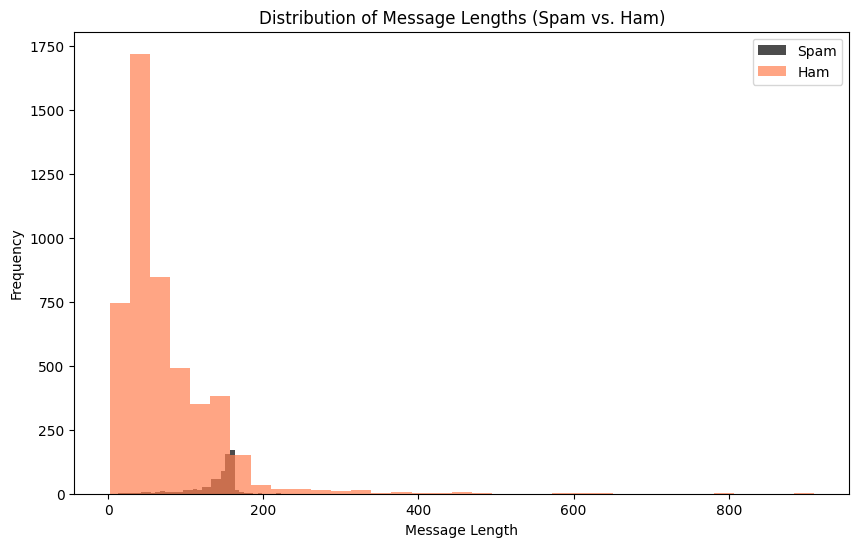

In [17]:

import matplotlib.pyplot as plt

# Plotting the distribution of message lengths for spam and ham
plt.figure(figsize=(10, 6))
data[data['label'] == 'spam']['length'].plot(bins=35, kind='hist', color='black', label='Spam', alpha=0.7)
data[data['label'] == 'ham']['length'].plot(bins=35, kind='hist', color='coral', label='Ham', alpha=0.7)
plt.title('Distribution of Message Lengths (Spam vs. Ham)')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()




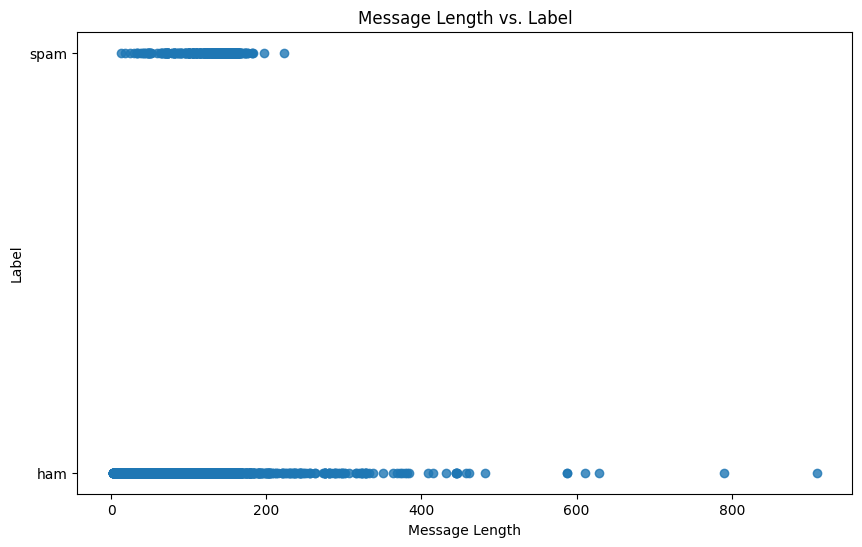

In [18]:
# Creating a scatter plot of message length vs. label
plt.figure(figsize=(10, 6))
plt.scatter(data['length'], data['label'], alpha=0.8)
plt.xlabel('Message Length')
plt.ylabel('Label')
plt.title('Message Length vs. Label')
plt.show()

In [19]:
data.length.describe()

,length
count,5571.000000
mean,80.484473
std,59.946894
min,2.000000
25%,36.000000
50%,62.000000
75%,122.000000
max,910.000000


In [23]:
print(len(list(data.messages[data.length > 900])))

1


<Figure size 1000x600 with 0 Axes>

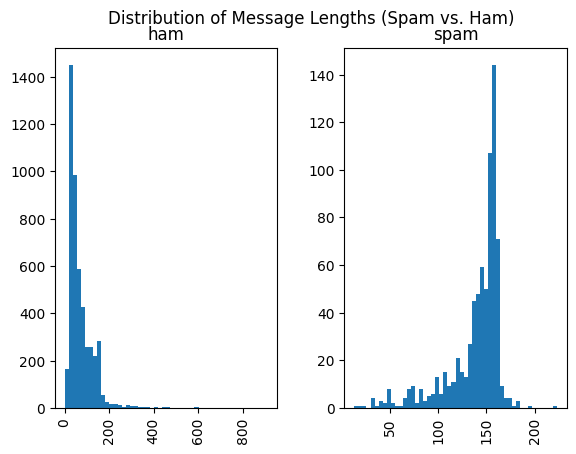

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
data.hist(column='length', by='label', bins=50)
plt.suptitle('Distribution of Message Lengths (Spam vs. Ham)')
plt.show()

In [25]:
def split_into_tokens(message):
    message = unicode(message, 'utf8')
    return TextBlob(message).words

In [26]:
data.messages.head()

,messages
0,Ok lar... Joking wif u oni...
1,Free entry in 2 a wkly comp to win FA Cup fina...
2,U dun say so early hor... U c already then say...
3,"Nah I don't think he goes to usf, he lives aro..."
4,FreeMsg Hey there darling it's been 3 week's n...


In [28]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
import re
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [31]:
def clean_text(text):
    text=str(text).lower()
    text=re.sub('[^a-zA-Z]', ' ', text)
    text=text.split()
    text = [word for word in text if word not in stop]
    text=' '.join(text)
    return text

In [33]:
data['messages']= data['messages'].apply(clean_text)
data.head()

,label,messages,length
0,ham,ok lar joking wif u oni,29
1,spam,free entry wkly comp win fa cup final tkts st ...,155
2,ham,u dun say early hor u c already say,49
3,ham,nah think goes usf lives around though,61
4,spam,freemsg hey darling week word back like fun st...,147


<ipython-input-35-385ed90f90aa>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data, x='length', y='label', inner='box', palette='Dark2')


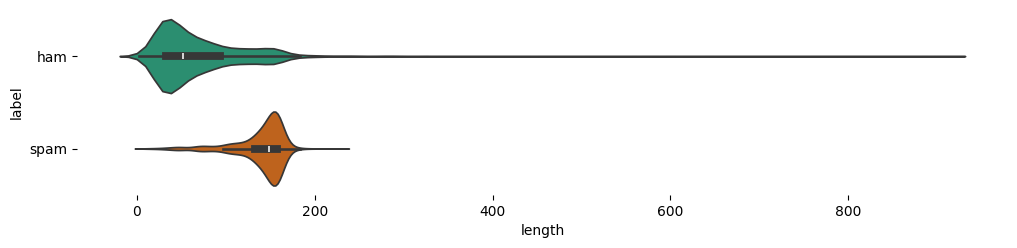

In [35]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='length', y='label', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [42]:
!pip install wordcloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
def plot_word_cloud(data, typ):
    email_corpus = " ".join(data['messages'])

    plt.figure(figsize=(7, 7))

    wc = WordCloud(background_color='black',
                   max_words=100,
                   width=800,
                   height=400,
                   collocations=False).generate(email_corpus)

    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'WordCloud for {typ} emails', fontsize=15)
    plt.axis('off')
    plt.show()

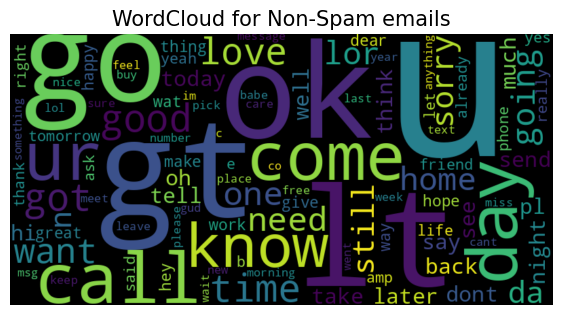

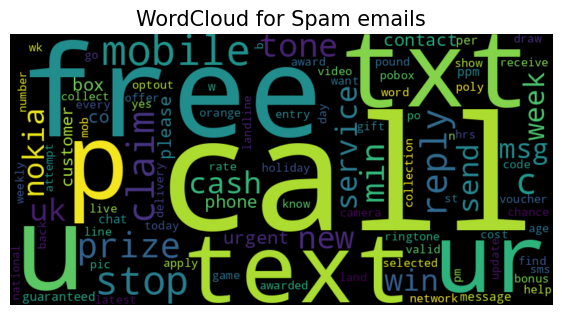

In [44]:
plot_word_cloud(data[data['label'] == "ham"], typ='Non-Spam')
plot_word_cloud(data[data['label'] == "spam"], typ='Spam')

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
X_train, X_test, y_train, y_test = train_test_split(data['messages'], data['label'], test_size=0.2, random_state=42)

In [47]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)